In [16]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA ## 대문자니까 클래스이다
breast_cancer = load_breast_cancer()
from sklearn.preprocessing import StandardScaler
breast_cancer_std = StandardScaler().fit_transform(breast_cancer.data) # 표준 정규분포로 전환
from sklearn.decomposition import PCA ## 대문자니까 클래스이다
pca2 = PCA(n_components=2) # 주성분을 몇개로 할거냐 회귀선 두개로 할거다.
pca5 = PCA(n_components=5) # 주성분을 몇개로 할거냐 회귀선 두개로 할거다.
pca10 = PCA(n_components=10) # 주성분을 몇개로 할거냐 회귀선 두개로 할거다.    

In [17]:
breast_cancer_pca2 = pca2.fit_transform(breast_cancer_std) # 데이터 변환을 해주는것은 핏 트랜스 폼이다
breast_cancer_pca5 = pca5.fit_transform(breast_cancer_std) # 데이터 변환을 해주는것은 핏 트랜스 폼이다
breast_cancer_pca10 = pca10.fit_transform(breast_cancer_std) # 데이터 변환을 해주는것은 핏 트랜스 폼이다


In [18]:
pca2.explained_variance_ratio_,pca5.explained_variance_ratio_,pca10.explained_variance_ratio_


(array([0.44272026, 0.18971182]),
 array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]))

분류정확도

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
## 원본데이터
X_train,X_test,y_train,y_test = train_test_split(
 breast_cancer.data,
 breast_cancer.target,
 stratify=breast_cancer.target,
 random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.972027972027972

In [21]:
## 차원축소2
X_train,X_test,y_train,y_test = train_test_split(
 breast_cancer_pca2,
 breast_cancer.target,
 stratify=breast_cancer.target,
 random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9370629370629371

In [22]:
## 차원축소5
X_train,X_test,y_train,y_test = train_test_split(
 breast_cancer_pca5,
 breast_cancer.target,
 stratify=breast_cancer.target,
 random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.965034965034965

In [23]:
## 차원축소10
X_train,X_test,y_train,y_test = train_test_split(
 breast_cancer_pca10,
 breast_cancer.target,
 stratify=breast_cancer.target,
 random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.972027972027972

In [24]:
df = pd.DataFrame(breast_cancer_pca2, columns=['PC1','PC2'])
df['target'] = breast_cancer.target
df.head(5)

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


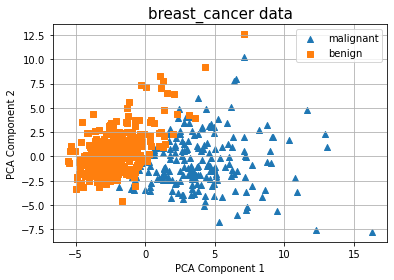

In [26]:
markers = ['^','s'] # Setosa-세모 , Versicolor-네모 , virginica-동그라미
df['PC1'] = breast_cancer_pca2[:,0]
df['PC2'] = breast_cancer_pca2[:,1]
df.head(3)

for i,marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,
                label=breast_cancer.target_names[i])
plt.legend() # 범례
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.title('breast_cancer data',fontsize = 15)
plt.grid()
plt.show()

군집화

In [109]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=2,random_state=2021)
Kmeans.fit(breast_cancer_std) # 정규분포로 데이터를 줘야한다
Kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [110]:
df['target'] = breast_cancer.target
df['cluster'] = Kmeans.labels_
df['PC1'] = breast_cancer_pca2[:,0]
df['PC2'] = breast_cancer_pca2[:,1]
df.tail()
df.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

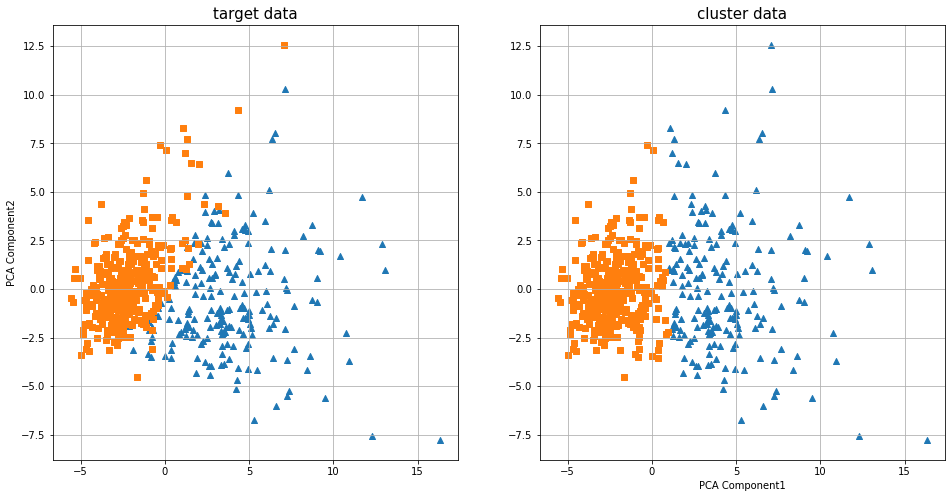

In [111]:
markers = ['^','s','o','^','s','o','^','s','o']
# for i in range(3):
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i,marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data,y_axis_data,marker=marker,)
    if column =='target':
        ax.set_title(f'{column} data',fontsize=15)
        ax.set_ylabel('PCA Component2')
        ax.grid()
    elif column =='cluster':
        ax.set_title(f'{column} data',fontsize=15)
        ax.set_xlabel(f'PCA Component1')
        ax.grid()
plt.show()

In [113]:
from sklearn.metrics import silhouette_samples,silhouette_score # 평가 지표

score_samples = silhouette_samples(breast_cancer_std,df.cluster)
df['실루엣 계수'] = score_samples
df.head()

,PC1,PC2,target,cluster,실루엣 계수
0,9.192837,1.948583,0,0,0.296634
1,2.387802,-3.768172,0,0,0.041947
2,5.733896,-1.075174,0,0,0.341336
3,7.122953,10.275589,0,0,0.143625
4,3.935302,-1.948072,0,0,0.166490


In [114]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.136913
1,0.450196


In [115]:
silhouette_score(breast_cancer_std,df.cluster)

0.3433822406907781

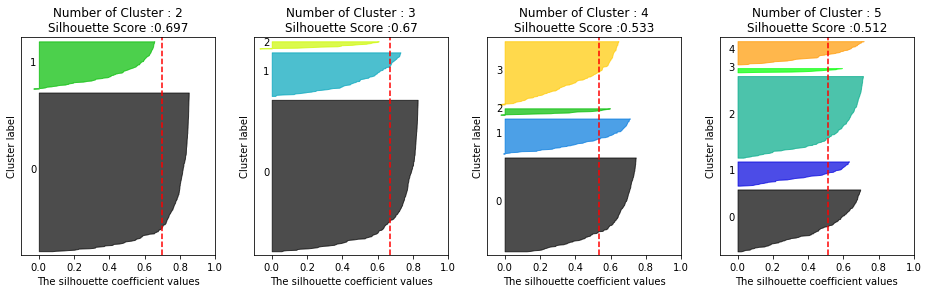

In [121]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5],breast_cancer.data)

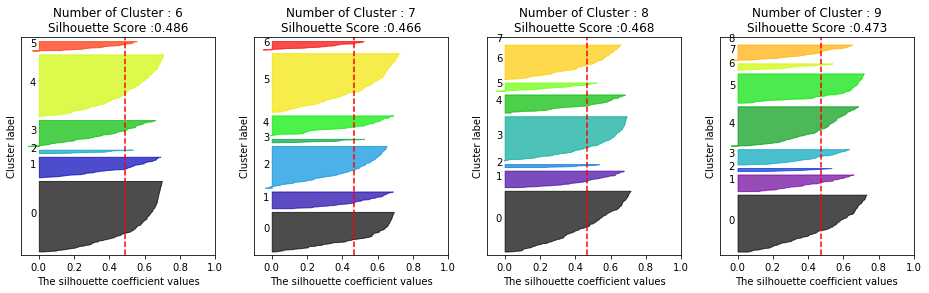

In [120]:
from visualize import visualize_silhouette
visualize_silhouette([6,7,8,9],breast_cancer.data)

In [119]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.136913
1,0.450196
